# Tabular Playground Series - Apr 2022

In this competition, you'll classify 60-second sequences of sensor data, indicating whether a subject was in either of two activity states for the duration of the sequence.

### Setup

In [3]:
%%capture

import pandas as pd
import seaborn as sns
sns.set(rc = {'figure.figsize':(10, 6)})

from ml_utils.preprocess.missing import check_missingness
from ml_utils.preprocess.pipeline import preprocessing_pipeline

### Load data

In [4]:
pipeline = {}

train = pd.read_csv("Data/train.csv")
train_labels = pd.read_csv("Data/train_labels.csv")
train = pd.merge(train, train_labels, on="sequence")

test = pd.read_csv("Data/test.csv")

print(f"Train shape {train.shape}")
print(f"Test shape {test.shape}")

Train shape (1558080, 17)
Test shape (733080, 16)


In [5]:
train.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,0
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,0
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,0
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,0
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,0


### EDA

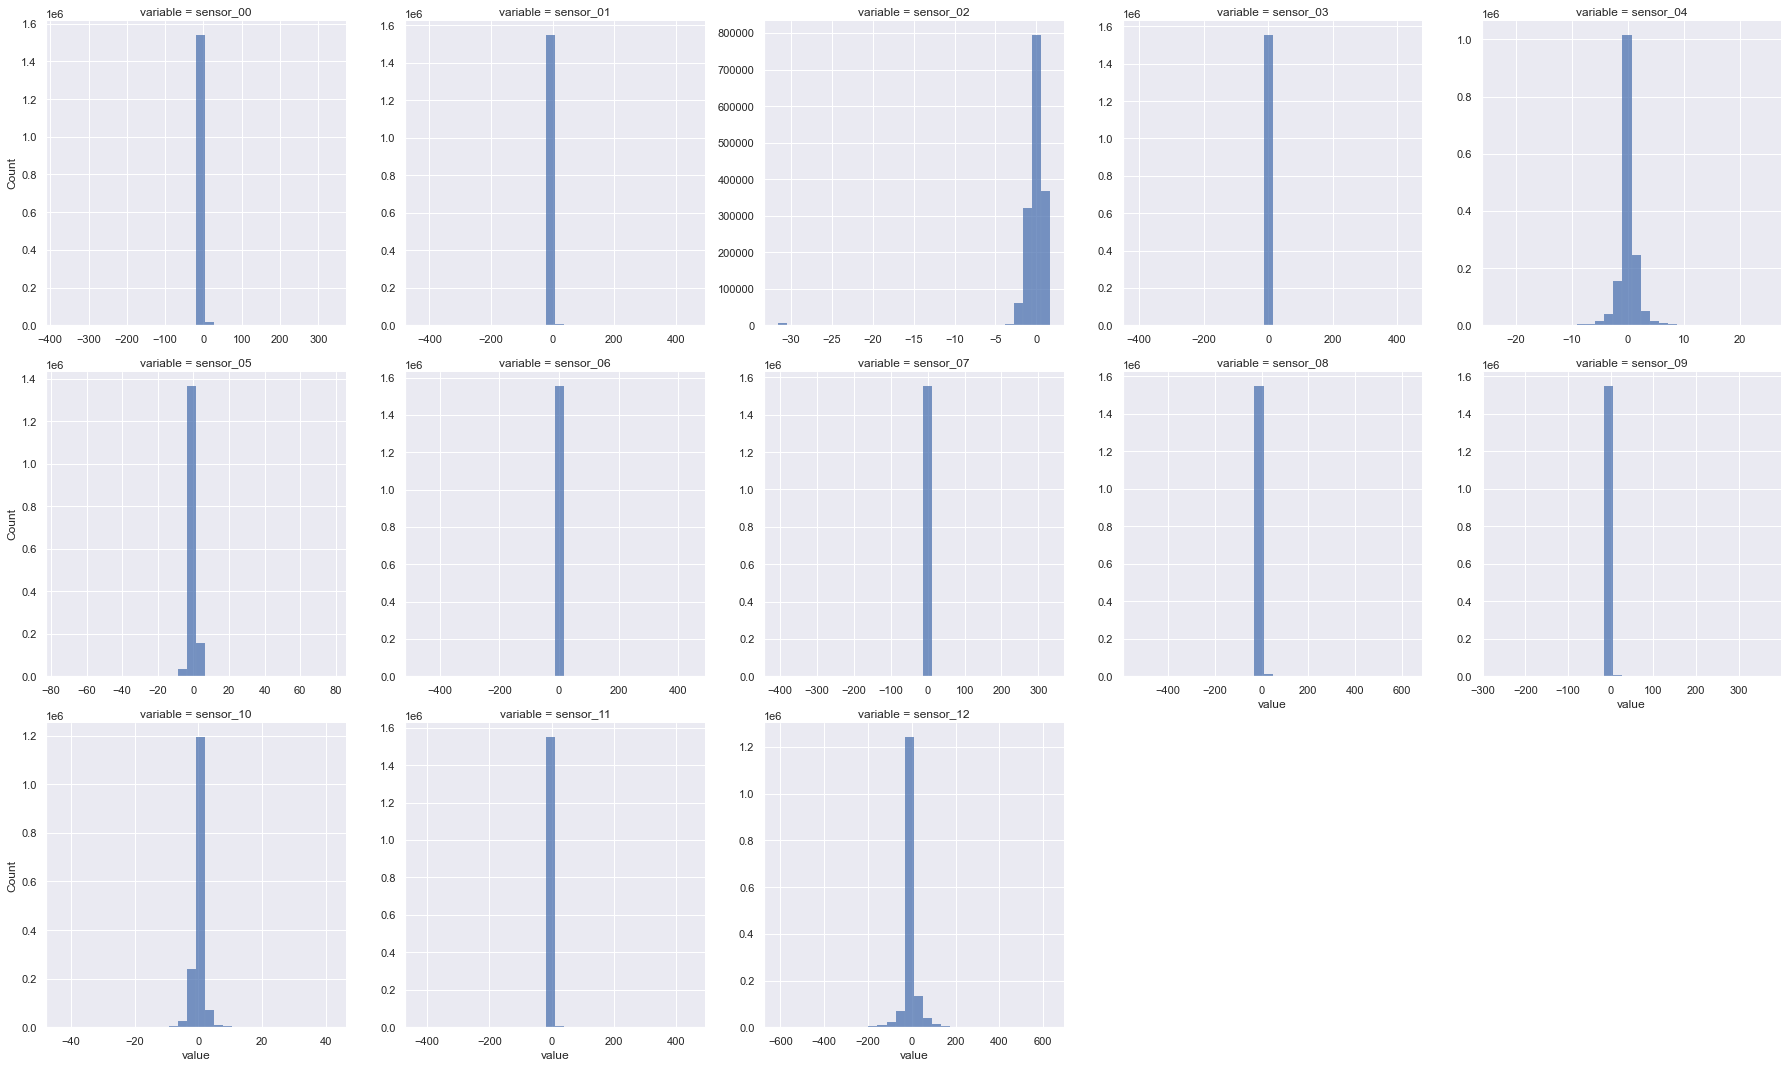

In [24]:
sensor_cols = [x for x in train.columns if 'sensor' in x]

sns.displot(
    data=pd.melt(train[sensor_cols]),
    x="value",
    col="variable",
    bins=30,
    col_wrap=5,
    common_bins=False,
    facet_kws=dict(
        sharex=False,
        sharey=False,
    )
)